In [19]:
import requests
import json
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

In [20]:
def download_and_extract_data(api_url):
    # Send GET request to the API URL
    response = requests.get(api_url)
    
    # Check if the request was successful
    if response.status_code == 200:
        # Parse the JSON response
        data = json.loads(response.text)
        
        # Extract the required data attributes
        show_id = data['id']
        show_url = data['url']
        show_name = data['name']
        episodes = data['_embedded']['episodes']
        
        # Extract data from each episode
        episode_data = []
        for episode in episodes:
            episode_id = episode['id']
            episode_season = episode['season']
            episode_number = episode['number']
            episode_type = episode['type']
            episode_airdate = episode['airdate']
            episode_airtime = episode['airtime']
            episode_runtime = episode['runtime']
            episode_rating = episode['rating']['average']
            episode_summary = BeautifulSoup(episode['summary'], 'html.parser').text
            episode_image_medium = episode['image']['medium']
            episode_image_original = episode['image']['original']
            
            # Create a dictionary with the extracted episode data
            episode_info = {
                'id': episode_id,
                'url': show_url,
                'name': show_name,
                'season': episode_season,
                'number': episode_number,
                'type': episode_type,
                'airdate': episode_airdate,
                'airtime': episode_airtime,
                'runtime': episode_runtime,
                'average_rating': episode_rating,
                'summary': episode_summary,
                'image_medium': episode_image_medium,
                'image_original': episode_image_original
            }
            
            # Append the episode data to the list
            episode_data.append(episode_info)
        
        # Return the extracted episode data
        return episode_data
    else:
        # Request was not successful
        print("Error:", response.status_code)

In [21]:
# Define the API URL
api_url = "http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes"

# Call the function to download and extract the data
data = download_and_extract_data(api_url)

In [22]:
# Get all the overall ratings for each season
season_ratings = {}
for episode in data:
    season = episode['season']
    rating = episode['average_rating']
    
    if season not in season_ratings:
        season_ratings[season] = []
    
    season_ratings[season].append(rating)

In [23]:
season_ratings

{1: [8, 7.7, 7.6, 7.9, 8, 8, 8.6, 7.9, 8.5, 8.7],
 2: [7.8, 7.7, 7.7, 8, 7.6, 7.7, 7.9, 8.7, 8.4, 8.5],
 3: [8, 7.8, 7.8, 8, 7.9, 7.5, 7.5, 7.7],
 4: [7.1, 7.4, 7.6, 7.7, 7.8, 7.5, 7.7, 7.5]}

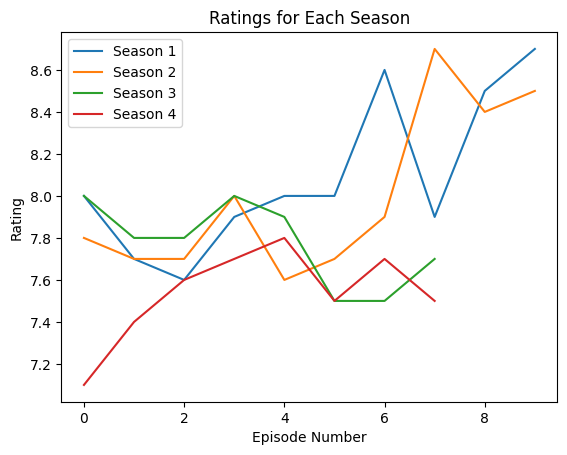

In [24]:
# Plotting the ratings for each season
for season, ratings in season_ratings.items():
    plt.plot(ratings, label=f"Season {season}")

plt.xlabel('Episode Number')
plt.ylabel('Rating')
plt.title('Ratings for Each Season')
plt.legend()
plt.show()

In [25]:
# Get all the episode names whose average rating is more than 8 for every season
high_rated_episodes = {}
for episode in data:
    season = episode['season']
    episode_name = episode['name']
    average_rating = episode['average_rating']
    
    if average_rating > 8:
        if season not in high_rated_episodes:
            high_rated_episodes[season] = []
        
        high_rated_episodes[season].append(episode_name)

In [26]:
high_rated_episodes

{1: ['Westworld', 'Westworld', 'Westworld'],
 2: ['Westworld', 'Westworld', 'Westworld']}

In [27]:
# Print the episode names with average rating > 8 for each season
for season, episodes in high_rated_episodes.items():
    print(f"Season {season} episodes with average rating > 8:")
    for episode in episodes:
        print(episode)
    print()

Season 1 episodes with average rating > 8:
Westworld
Westworld
Westworld

Season 2 episodes with average rating > 8:
Westworld
Westworld
Westworld



In [28]:
# Get all the episode names that aired before May 2019
early_episodes = []
for episode in data:
    airdate = episode['airdate']
    
    if airdate < '2019-05-01':
        early_episodes.append(episode['name'])

In [29]:
# Print the episode names that aired before May 2019
print("Episodes that aired before May 2019:")
for episode in early_episodes:
    print(episode)
print()

Episodes that aired before May 2019:
Westworld
Westworld
Westworld
Westworld
Westworld
Westworld
Westworld
Westworld
Westworld
Westworld
Westworld
Westworld
Westworld
Westworld
Westworld
Westworld
Westworld
Westworld
Westworld
Westworld



In [30]:
# Get the episode name from each season with the highest and lowest rating
highest_rated_episodes = {}
lowest_rated_episodes = {}
for episode in data:
    season = episode['season']
    episode_name = episode['name']
    average_rating = episode['average_rating']
    
    if season not in highest_rated_episodes:
        highest_rated_episodes[season] = {
            'name': episode_name,
            'rating': average_rating
        }
        lowest_rated_episodes[season] = {
            'name': episode_name,
            'rating': average_rating
        }
    else:
        if average_rating > highest_rated_episodes[season]['rating']:
            highest_rated_episodes[season]['name'] = episode_name
            highest_rated_episodes[season]['rating'] = average_rating
        
        if average_rating < lowest_rated_episodes[season]['rating']:
            lowest_rated_episodes[season]['name'] = episode_name
            lowest_rated_episodes[season]['rating'] = average_rating

In [31]:
# Print the episode with the highest and lowest rating for each season
for season, episode in highest_rated_episodes.items():
    print(f"Highest rated episode in Season {season}: {episode['name']} (Rating: {episode['rating']})")

for season, episode in lowest_rated_episodes.items():
    print(f"Lowest rated episode in Season {season}: {episode['name']} (Rating: {episode['rating']})")

Highest rated episode in Season 1: Westworld (Rating: 8.7)
Highest rated episode in Season 2: Westworld (Rating: 8.7)
Highest rated episode in Season 3: Westworld (Rating: 8)
Highest rated episode in Season 4: Westworld (Rating: 7.8)
Lowest rated episode in Season 1: Westworld (Rating: 7.6)
Lowest rated episode in Season 2: Westworld (Rating: 7.6)
Lowest rated episode in Season 3: Westworld (Rating: 7.5)
Lowest rated episode in Season 4: Westworld (Rating: 7.1)


In [32]:
# Get the episode with the highest average rating in every season
most_popular_episodes = {}
for episode in data:
    season = episode['season']
    episode_name = episode['name']
    average_rating = episode['average_rating']
    summary = episode['summary']
    
    if season not in most_popular_episodes:
        most_popular_episodes[season] = {
            'name': episode_name,
            'average_rating': average_rating,
            'summary': summary
        }
    else:
        if average_rating > most_popular_episodes[season]['average_rating']:
            most_popular_episodes[season]['name'] = episode_name
            most_popular_episodes[season]['average_rating'] = average_rating
            most_popular_episodes[season]['summary'] = summary

In [33]:
# Print the summary for the most popular episode in each season
for season, episode in most_popular_episodes.items():
    print(f"Summary for the most popular episode in Season {season}:")
    print(f"Episode Name: {episode['name']}")
    print(f"Average Rating: {episode['average_rating']}")
    print(f"Summary: {episode['summary']}")
    print()


Summary for the most popular episode in Season 1:
Episode Name: Westworld
Average Rating: 8.7
Summary: Delores finds out the truth about William's fate. Meanwhile, Maeve organizes an escape plan, only to discover that someone else is pulling the strings. And Robert plays the final piece in his grand narrative.

Summary for the most popular episode in Season 2:
Episode Name: Westworld
Average Rating: 8.7
Summary: Another of Westworld's Host revolutionaries is revealed. Meanwhile, Emily finds the Man and convinces the Ghost Nation to hand him over to her to ensure his suffering.

Summary for the most popular episode in Season 3:
Episode Name: Westworld
Average Rating: 8
Summary: If you're stuck in a loop, try walking in a straight line.

Summary for the most popular episode in Season 4:
Episode Name: Westworld
Average Rating: 7.8
Summary: God is bored.

